In [1]:
import datacube

In [2]:
dc = datacube.Datacube(app="test_knu_geoinformatics_gtopo_30as")

In [3]:
# за замовчуванням координати полігону, в межах якого розташована територія Канади
bounds = [-141.0068664599999977,41.6769256600000020, -52.6188888499999976,83.1104202300000026] 


In [ ]:
#TODO - зробити візуалізацію для інших bounds, розташування полігону можна обрати на свій розсуд
bounds = 

In [4]:
def get_gtopo_30as_product(dc, bounds, res=0.008):

    query = {'product': "GTOPO_30AS",
            'output_crs' : 'EPSG:4326',
            'crs': 'EPSG:4326', 
            'resolution' : (-res, res),
            'lat': (bounds[1], bounds[3]), 
            'lon': (bounds[0], bounds[2])
            } 
    
    ds = dc.load(**query)

    return ds

In [5]:
ds = get_gtopo_30as_product(dc, bounds)

In [6]:
ds

<xarray.Dataset>
Dimensions:      (time: 1, latitude: 5180, longitude: 11049)
Coordinates:
  * time         (time) datetime64[ns] 1996-12-01
  * latitude     (latitude) float64 83.11 83.1 83.09 83.08 ... 41.69 41.68 41.68
  * longitude    (longitude) float64 -141.0 -141.0 -141.0 ... -52.63 -52.62
    spatial_ref  int32 4326
Data variables:
    DEM          (time, latitude, longitude) int16 -9999 -9999 ... -9999 -9999
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

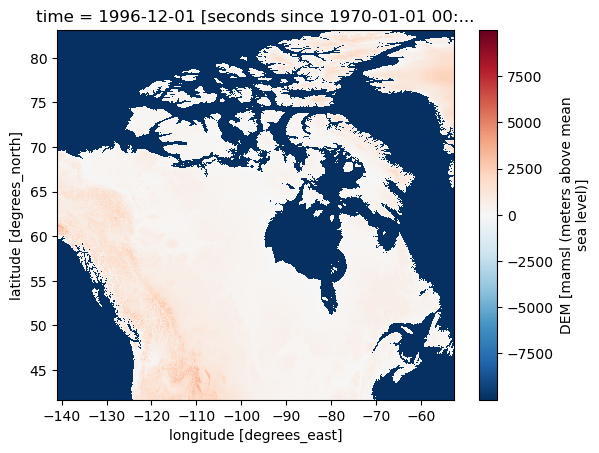

In [7]:
ds['DEM'].isel(time=0).plot.imshow()